# Introduction

In this notebook we tried to understand various algorithm to calculated different statistics of given network. This will be helpful when we are doing some behaviour or network measurement. This kind of measurement helps in understanding different structural properties of given network.

In the mining of social median, these statistics are very useful. As we know complex system can be easly represented using graph and social network is one of complex network which is represented as graph. 

The usual question in social media mining are:

  • Who are the central figures (influential individuals) in the network?

  • What interaction patterns are common in friends?

  • Who are the like-minded users and how can we find these similar
  individuals?

  To find these, we need to have some quantifying method. Based on these quantifying procedure, we can answer these questions. The statistics discussed in this notebook will be helpful to quantify those values.

#Problem Statement

Create various statistics of network and store them into pandas using function module

#List of algorithm used in this notebook

#List of Libraries used

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#The Data

##Load the Data

### Astro Physics collaboration network
from http://snap.stanford.edu/data/ca-AstroPh.html

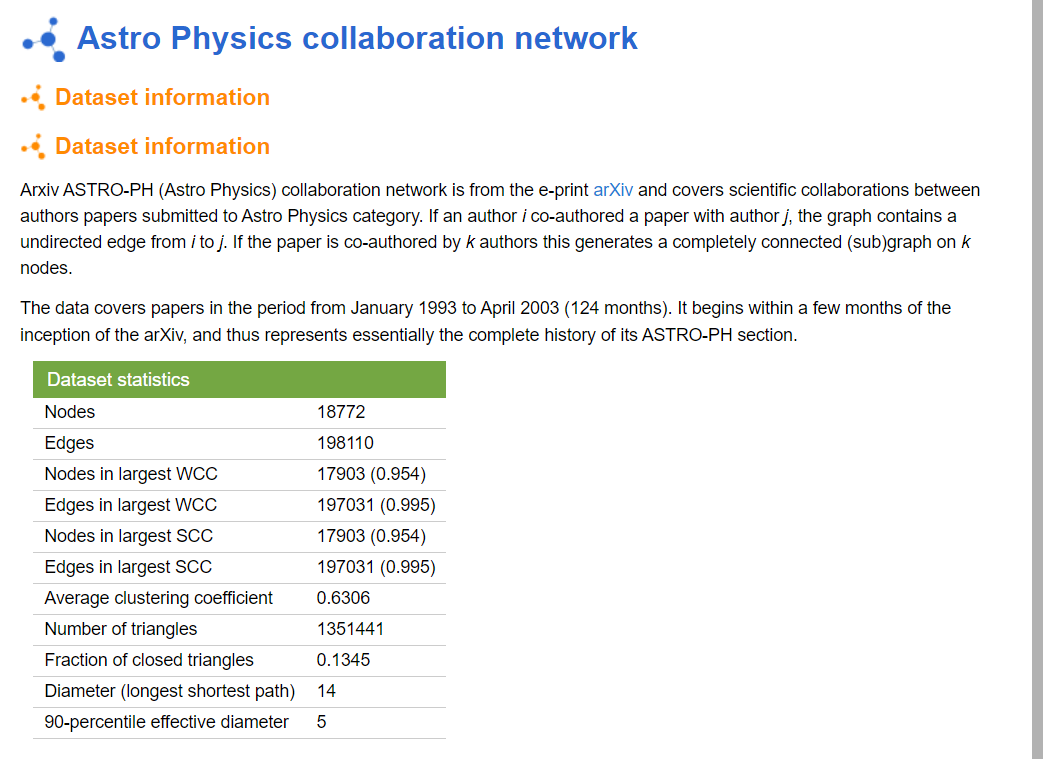

**Load file from Gdrive**

In [ ]:
from google.colab import drive
import pandas as pd
#drive.mount('/content/gdrive/', force_remount=True)
fname = '/content/drive/MyDrive/Colab Notebooks/Graph_classification_AnkurSir/CA-AstroPh_1.txt'
astr_phy = pd.read_csv(fname,
                          na_values='?', comment='\t',
                          sep='\t', skipinitialspace=True,header=0)
astr_phy.head(100)

,FromNodeId,ToNodeId
0,84424,276
1,84424,1662
2,84424,5089
3,84424,6058
4,84424,6229
...,...,...
95,89308,113138
96,89308,116343
97,89308,116453
98,89308,118859


### Synthatic random graph

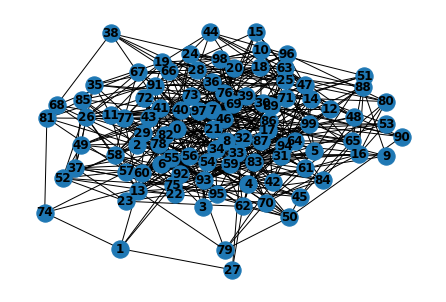

In [ ]:
# Generate the Random Graph)
G = nx.erdos_renyi_graph(100,0.1)
nx.draw(G, with_labels=True, font_weight='bold')

### Social network data

# Understand the Graph Data
Graph data can be understood by collectiing various statistics at node level and graph level.


Following measurments are important in social network:

Q1) Who are the central figures (influential individuals) in the network?

This can be measured using Centrality values for each nodes based on various criterion.Centrality defines how important a node is within a network.

    1.1 Centrality in terms of those who you are connected to
      a) Degree centrality
      b) Eigenvector Centrality
      c) Katz Centrality
      d) PageRank
    1.2 Centrality in terms of how you connect others:
      a) Betweenness Centrality
    1.3 Centrality in terms of how fast you can reach others
      a)Closeness Centrality
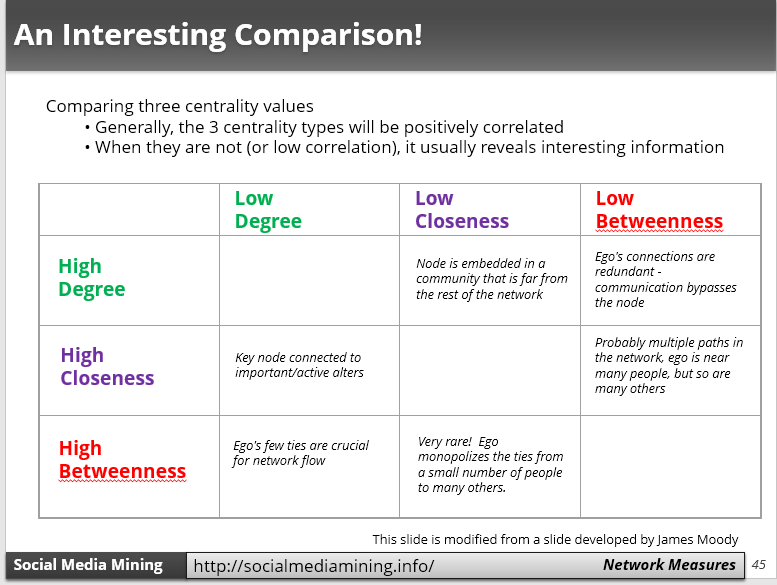

Q2) What interaction patterns are common in friends?

This is measured using "Reciprocity and Transitivity" and "Balance and Status"

Q3) Who are the like-minded users and how can we find these similar individuals?

This can be measured using Similarity



## Degree Centrality:


**Paper/Book chapter Name:** Chapter-3

**Paper Number for refrence in this notebook:** [1]

**Year of Publish:** 2014

**Journal/Book name:** Social Media Mining,An Introduction

**Author:** Reza Zafarani,Mohammad Ali Abbasi,Huan Liu

**Paper summary:**

**NODE-LEVEL STATISTICS AND FEATURES**:

In treditional approach, we collect some statistics or feature based on heuristic functions or domain knowledge and then use these features as input to a standard machine learning classifier (e.g., logistic regression). In this we need to look for those statistci which can diffrentiate the nodes. This diffrentiation becomes the basis for input to classical machine learning algorithms. Following are useful statistics:

1. *Node degree*: The number of edges incident to a Node.For directed graph we need to calculate incoming and outgoing edges on the Node.  This is often one of the most informative features in traditional machine learning models applied to node-level tasks. We can use degree distribution too to define feature of ML.
2. *Node Centrality*: Who are the central figures (influential individuals) in the network? Centrality defines how important a node is within a network.Importnace of node in the graph is not determin by node degree. Node centrality gives more powerful ways measure importnace of node which becomes important feature in machine learning. Node centrality can be calculated in various ways as follows:
  2.1 *Centrality in terms of those who you are connected to*:

	  a) Degree centrality:Ranks nodes with more connections higher in terms of centrality.In directed graphs, we can either use the in-degree, the out-degree, or the combination as the degree centrality value. in-degree is known as prestige and out-degree know as gregariousness.
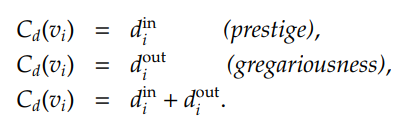

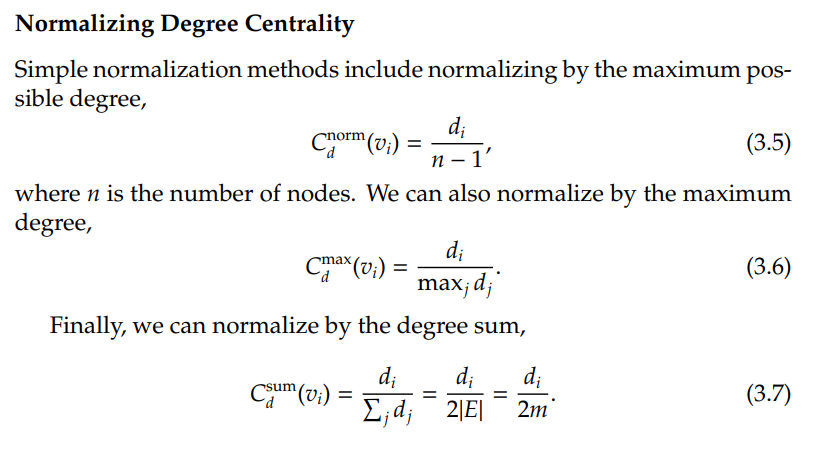

In [ ]:
# In the Undirected graph:
# Node degree
deg = nx.degree(G)
G_df = pd.DataFrame.from_dict(deg)
G_df.rename(columns = {0:'Node_label', 1:'Node_deg'}, inplace = True)
# Degree Normalization using max possible degree ( n-1)
max_possible_degree = G.number_of_nodes() -1
G_df['norm_max_possible_deg'] = G_df['Node_deg'].div(max_possible_degree)
# Degree Normalization using max degree
max_degree = G_df['Node_deg'].max()
G_df['norm_max_deg'] = G_df['Node_deg'].div(max_degree)
# Degree Normalization using degree sum
degree_sum = G_df['Node_deg'].sum()
G_df['norm_deg_sum'] = G_df['Node_deg'].div(degree_sum)
G_df.head()
# For directed graph same operation based on in and out degree. Leave it for actual case.

,Node_label,Node_deg,norm_max_possible_deg,norm_max_deg,norm_deg_sum
0,0,11,0.111111,0.611111,0.010721
1,1,12,0.121212,0.666667,0.011696
2,2,7,0.070707,0.388889,0.006823
3,3,10,0.101010,0.555556,0.009747
4,4,6,0.060606,0.333333,0.005848


## Eigenvector Centrality

In degree centrality, we consider nodes with more connections to be more
important. However, in real-world scenarios, having more friends does
not by itself guarantee that someone is important: having more important
friends provides a stronger signal. Before getting into eigenvector centrality, lets undertsand the eigen vector and its significance.
For any square matrix A we can find there eigen value and eigen vectore as shwon below

**AX = λX**
where 
A is the square matrix,
X ≠0 ==> Eigen vectore or characteristic vector of matrix A.
λ ==> This is scaler which is called eigen value or characteristic value or latent root of the matrix A.

Eigen vector gives pricipal direction and for largest eigen value, eigen vector will be maximal in principal direction. Eigenvalues show you how strong the system is in it's corresponding eigenvector direction. So the Eigenvector and egien value  of adjacency matrix of graph gives information about importannt nodes corrected to the given node.  Since we can have many eigen values and egien vector of matrix so , this raises the question: which eigenvalue–
eigenvector pair should we select? We often prefer centrality values to
be positive for convenient comparison of centrality values across nodes. Thus, we can choose an eigenvalue such that the eigenvector components are positive. NetworkX provides **eigenvector_centrality** library which we can use to compute eigen vector centrality of all nodes in the graph.





In [ ]:
# EigenVector Centrality calculation using networkX library
ec = nx.eigenvector_centrality(G)
ec_df = pd.DataFrame(list(ec.items()),columns = ['Node_label','EC'])
G_df_outer = pd.merge(G_df, ec_df, on='Node_label', how='outer') #here Node_label is common column
G_df_outer.head()

,Node_label,Node_deg,norm_max_possible_deg,norm_max_deg,norm_deg_sum,EC
0,0,11,0.111111,0.611111,0.010721,0.100140
1,1,12,0.121212,0.666667,0.011696,0.129026
2,2,7,0.070707,0.388889,0.006823,0.063620
3,3,10,0.101010,0.555556,0.009747,0.080881
4,4,6,0.060606,0.333333,0.005848,0.058216


## Katz Centrality

For Directed Acyclic Graph eigenvector centrality becomes zero. This was major problem with EigenVector centrality. In this case, the problem
can be rectified by adding a bias term to the centrality value. The bias term
β is added to the centrality values for all nodes no matter how they are
situated in the network. The resulting centrality measure is called the Katz centrality. katz_centrality function from networkX can be used to compute the katz centrality.


 α < 1/λ where λ is max eigenvalue of adjacency matrix.

In [ ]:
import numpy as np
from numpy.linalg import eig
# Generate numpy adjacency matrix from graph
A = nx.to_numpy_array(G)
# finid Eigen value of matrix using python library
w,v=eig(A) # All eigen value and eigen vector
max_eigen = np.amax(w) # Max Eigen value
# kartz centrality calculation
α_max = 1/max_eigen
α = α_max*0.9 # taking 90% of max eigen value
kc = nx.katz_centrality_numpy(G,alpha=α, beta=1.0)
# the kc value in pandas
kc_df = pd.DataFrame(list(kc.items()),columns = ['Node_label','KC'])
G_df_outer1 = pd.merge(G_df_outer, kc_df, on='Node_label', how='outer') #here Node_label is common column
G_df_outer1.head()

,Node_label,Node_deg,norm_max_possible_deg,norm_max_deg,norm_deg_sum,EC,KC
0,0,11,0.111111,0.611111,0.010721,0.100140,0.122278
1,1,12,0.121212,0.666667,0.011696,0.129026,0.046312
2,2,7,0.070707,0.388889,0.006823,0.063620,0.092669
3,3,10,0.101010,0.555556,0.009747,0.080881,0.072694
4,4,6,0.060606,0.333333,0.005848,0.058216,0.135758


## Page Rank Centrality

Similar to eigenvector centrality, Katz centrality encounters some challenges. A challenge that happens in directed graphs is that, once a node
becomes an authority (high centrality), it passes all its centrality along all
of its out-links. This is less desirable, because not everyone known by
a well known person is well known. To mitigate this problem, one can
divide the value of passed centrality by the number of outgoing links (out-degree) from that node such that each connected neighbor gets a fraction
of the source node’s centrality

In [ ]:
prc = nx.pagerank_numpy(G, alpha=0.9) # alpha is damping factor
# the prc value in pandas
prc_df = pd.DataFrame(list(prc.items()),columns = ['Node_label','PRC'])
G_df_outer2 = pd.merge(G_df_outer1, prc_df, on='Node_label', how='outer') #here Node_label is common column
G_df_outer2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  """Entry point for launching an IPython kernel.


,Node_label,Node_deg,norm_max_possible_deg,norm_max_deg,norm_deg_sum,EC,KC,PRC
0,0,11,0.111111,0.611111,0.010721,0.100140,0.122278,0.012090
1,1,12,0.121212,0.666667,0.011696,0.129026,0.046312,0.005708
2,2,7,0.070707,0.388889,0.006823,0.063620,0.092669,0.010602
3,3,10,0.101010,0.555556,0.009747,0.080881,0.072694,0.006004
4,4,6,0.060606,0.333333,0.005848,0.058216,0.135758,0.012899


## Betweenness Centrality

## Closeness Centrality

## Reciprocity and Transitivity

## Balance and Status

## Like-minded users

## Model Accuracy measurement

#Key Challenges 

#Potential Risk

#Future Work

#References